# **CAPSTONE PROJECT - CLASSIFICATION**

## **IMPORT PACKAGES**

In [1]:
# Import Package
import os
import pandas as pd
import numpy as np

# Package untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Package untuk cleaning, modelling, dan evaluation model
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, KFold, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn import metrics

## **READ DATASET**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Data Science - Mechine Learning/Data/Meet 11/reservasi_hotel.csv",sep=";")

In [ ]:
df.head()

,tipe_hotel,pembatalan,waktu_tunggu,tahun_kedatangan,bulan_kedatangan,minggu_kedatangan,tanggal_kedatangan,menginap_di_weekend,menginap_in_week_nights,dewasa,...,tipe_ruang,tipe_kamar_ditentukan,perubahan_pemesanan,tipe_deposit,company,days_in_waiting_list,tipe_customer,adr,required_car_parking_spaces,status_reservasi
0,Resort Hotel,Tidak,342,2017,July,27,1,0,0,2,...,C,C,3,No Deposit,NaN,0,Transient,0,0,Check-Out
1,Resort Hotel,Tidak,737,2017,July,27,1,0,0,2,...,C,C,4,No Deposit,NaN,0,Transient,0,0,Check-Out
2,Resort Hotel,Tidak,7,2017,July,27,1,0,1,1,...,A,C,0,No Deposit,NaN,0,Transient,75,0,Check-Out
3,Resort Hotel,Tidak,13,2017,July,27,1,0,1,1,...,A,A,0,No Deposit,NaN,0,Transient,75,0,Check-Out
4,Resort Hotel,Tidak,14,2017,July,27,1,0,2,2,...,A,A,0,No Deposit,NaN,0,Transient,98,0,Check-Out


## **PROBLEM STATEMENT**



*   Perusahaan ingin mengetahui bagaimana profiling dari customer hotel mitranya, dari negara mana, bagaimana karakteristik dalam pemesanan hotel dilihat berdasarkan resort hotel dan city hotel
*   Perusahaan ingin fokus pada karakteristik yang melakukan pembatalan sebelumnya. Hal ini ingin mengoptimalkan dengan menerapkan kebijakan baru agar tidak terjadi pembatalan yang berlebih, karena dapat merugikan perusahaan.
*   Membuat mechine learning dengan feature-feature dan berikan kebijakan berdasarkan model mechine learning yang kamu buat untuk mengoptimalkan website pemesanan online hotel





## **EDA**

In [ ]:
df.columns

Index(['tipe_hotel', 'pembatalan', 'waktu_tunggu', 'tahun_kedatangan',
       'bulan_kedatangan', 'minggu_kedatangan', 'tanggal_kedatangan',
       'menginap_di_weekend', 'menginap_in_week_nights', 'dewasa', 'anak_anak',
       'babies', 'meal', 'negara', 'market_segment', 'tamu_berulang',
       'pembatalan_sebelumnya', 'pemesanan_sebelumnya_tidak_dibatalkan',
       'tipe_ruang', 'tipe_kamar_ditentukan', 'perubahan_pemesanan',
       'tipe_deposit', 'company', 'days_in_waiting_list', 'tipe_customer',
       'adr', 'required_car_parking_spaces', 'status_reservasi'],
      dtype='object')

Lihat Perbandingan antara jumlah cutomer yang melakukan pembatalan atau melanjutkan pemesanan

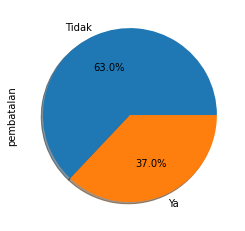

In [ ]:
df["pembatalan"].value_counts().plot.pie(autopct="%1.1f%%",shadow=True)

***Dari chart diatas dapat disimpulkan dari data yang ada sebanyak 63% customer melanjutkan pemesanan dan cukup besar yang melakukan pembatalan yaitu 37%***

### 1.0 Cari tau profiling dari customer

#### cari tau dari negara mana saja customer? 

Untuk mencari tau profiling customer maka dilakukan filter customer yang benar2 melakukan pemesanan (tidak melakukan pembatalan)

In [ ]:
#Negara Dengan Customer Terbanyak
dforder = df[['negara']][df["pembatalan"]=="Tidak"].value_counts().sort_values(ascending=False)
dforder.head()

negara
PRT       21071
GBR        9676
FRA        8481
ESP        6391
DEU        6069
dtype: int64

In [ ]:
#Jumlah Negara Dengan Customer paling sedikit
dforder = df[['negara']][df["pembatalan"]=="Tidak"].value_counts().sort_values(ascending=False)
dforder[dforder==1].count()

31

**Berdasarkan data diatas dapat dilihat 5 negara dengan customer terbanyak yaitu Portugal** sebanyak **21071**, disusul dengan 4 negara lain yaitu 
- United Kingdom 9676
- France        8481
- Spain        6391
- Germany        6069 

dan  Jumlah Negara Dengan Customer paling sedikit yaitu sebanyak 31 negara

Lihat kembali negara2 yang memiliki order paling banyak berdasarkan tipe hotelnya

In [5]:
negara = df[['tipe_hotel','negara']][df["negara"].isin(["PRT","GBR","FRA","ESP","DEU"])].value_counts().sort_values(ascending=False)
negara

tipe_hotel    negara
City Hotel    PRT       30960
Resort Hotel  PRT       17630
City Hotel    FRA        8804
Resort Hotel  GBR        6814
City Hotel    DEU        6084
              GBR        5315
              ESP        4611
Resort Hotel  ESP        3957
              FRA        1611
              DEU        1203
dtype: int64

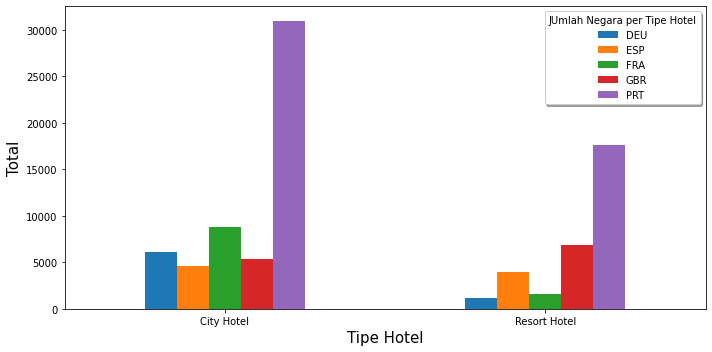

In [6]:
negara.unstack().plot(kind='bar')
plt.xlabel('Tipe Hotel',fontsize=15)
plt.ylabel('Total',fontsize=15)
plt.legend(bbox_to_anchor=(1,1),shadow=True,ncol=1,title='JUmlah Negara per Tipe Hotel')
plt.ylim(ymin=0)
label,location = plt.yticks()
plt.xticks(rotation=0)
plt.gcf().set_size_inches(10,5)
plt.tight_layout()
plt.show()

####karakteristik dalam pemesanan hotel dilihat berdasarkan resort hotel dan city hotel

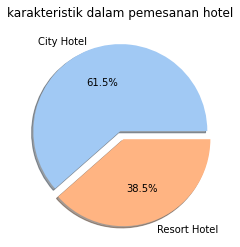

In [7]:
f,ax = plt.subplots(1,1,figsize=(12,4))
presentasecustomer = df[df["pembatalan"]=="Tidak"].groupby(["tipe_hotel"])['tipe_hotel'].count()
colors = sns.color_palette('pastel')
presentasecustomer.plot.pie(explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=colors).set_title('karakteristik dalam pemesanan hotel')
ax.set_ylabel('')
plt.show()

***Dari pie chart dapat dilihat customer lebih banyak memesan City Hotel dibandingkan dengan Resort Hotel, dengan perbandungan 61.6 banding 38.5 persen ***

###2.0 Cari tau karakteristik customer yang melakukan pembatalan

In [ ]:
df.columns

Index(['tipe_hotel', 'pembatalan', 'waktu_tunggu', 'tahun_kedatangan',
       'bulan_kedatangan', 'minggu_kedatangan', 'tanggal_kedatangan',
       'menginap_di_weekend', 'menginap_in_week_nights', 'dewasa', 'anak_anak',
       'babies', 'meal', 'negara', 'market_segment', 'tamu_berulang',
       'pembatalan_sebelumnya', 'pemesanan_sebelumnya_tidak_dibatalkan',
       'tipe_ruang', 'tipe_kamar_ditentukan', 'perubahan_pemesanan',
       'tipe_deposit', 'company', 'days_in_waiting_list', 'tipe_customer',
       'adr', 'required_car_parking_spaces', 'status_reservasi'],
      dtype='object')

In [ ]:
cspembatalan = df[df["pembatalan"]=="Ya"]
cspembatalan

,tipe_hotel,pembatalan,waktu_tunggu,tahun_kedatangan,bulan_kedatangan,minggu_kedatangan,tanggal_kedatangan,menginap_di_weekend,menginap_in_week_nights,dewasa,...,tipe_ruang,tipe_kamar_ditentukan,perubahan_pemesanan,tipe_deposit,company,days_in_waiting_list,tipe_customer,adr,required_car_parking_spaces,status_reservasi
8,Resort Hotel,Ya,85,2017,July,27,1,0,3,2,...,A,A,0,No Deposit,NaN,0,Transient,82,0,Canceled
9,Resort Hotel,Ya,75,2017,July,27,1,0,3,2,...,D,D,0,No Deposit,NaN,0,Transient,"105,5",0,Canceled
10,Resort Hotel,Ya,23,2017,July,27,1,0,4,2,...,E,E,0,No Deposit,NaN,0,Transient,123,0,Canceled
27,Resort Hotel,Ya,60,2017,July,27,1,2,5,2,...,E,E,0,No Deposit,NaN,0,Transient,107,0,Canceled
32,Resort Hotel,Ya,96,2017,July,27,1,2,8,2,...,E,E,0,No Deposit,NaN,0,Transient,"108,3",0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110280,City Hotel,Ya,132,2019,April,17,25,0,0,0,...,D,K,1,No Deposit,NaN,0,Transient,0,0,Canceled
111355,City Hotel,Ya,4,2019,June,23,5,1,0,1,...,A,A,0,No Deposit,238.0,0,Transient,65,0,Canceled
111924,City Hotel,Ya,7,2019,May,22,31,0,1,1,...,A,A,0,No Deposit,238.0,0,Transient,65,0,Canceled
111925,City Hotel,Ya,6,2019,July,29,17,1,0,1,...,A,D,0,No Deposit,238.0,0,Transient,65,0,No-Show


####Cari tahu berdasarkan tipe hotel

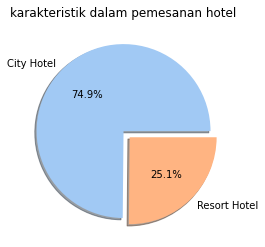

In [ ]:
f,ax = plt.subplots(1,1,figsize=(12,4))
presentasecustomerbatal = df[df["pembatalan"]=="Ya"].groupby(["tipe_hotel"])['tipe_hotel'].count()
colors = sns.color_palette('pastel')
presentasecustomerbatal.plot.pie(explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=colors).set_title('karakteristik dalam pemesanan hotel')
ax.set_ylabel('')
plt.show()

***City hotel memiliki jumlah pembatalan paling banyak sekitar 74.9%, berbanding lurus dengan jumlah pesanan terbanyak yaitu dari city hotel. Berarti dalam hal ini perusahaan perlu meningkatkan upaya promosi agar customer juga dapat tertarik pada tipe Resort Hotel mengingat angka presentasi pemesanan Resort Hotel yang kecil. selain itu juga perlu dicari tau mengapa customer banyak melakukan pembatalan pesanan pada city hotel***

####Cari tau  lebih lanjut karakteristik cutomer yg melakukan pembatalan 

In [ ]:
feature = cspembatalan[['dewasa', 'anak_anak',
       'babies', 'meal', 'market_segment', 'tamu_berulang',
       'tipe_ruang', 'tipe_kamar_ditentukan', 'perubahan_pemesanan',
       'tipe_deposit','tipe_customer','required_car_parking_spaces']]

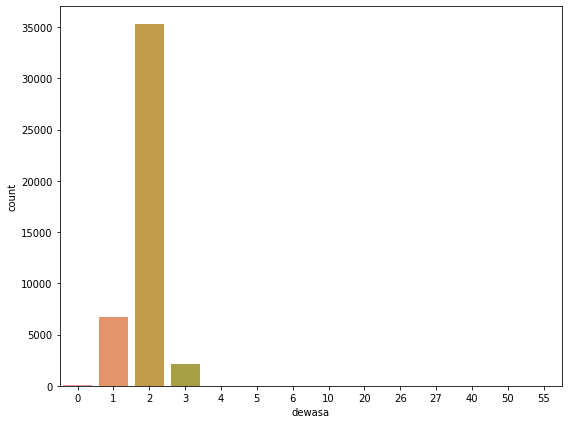

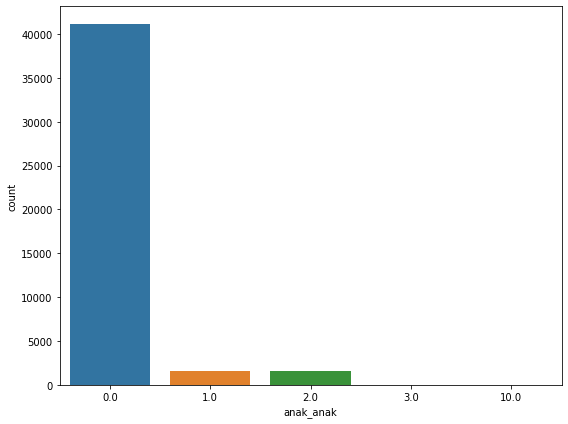

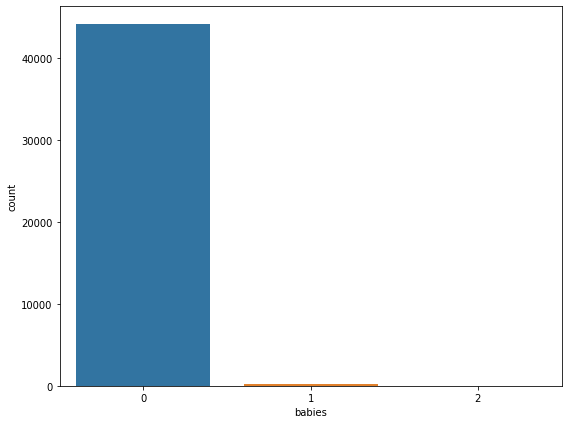

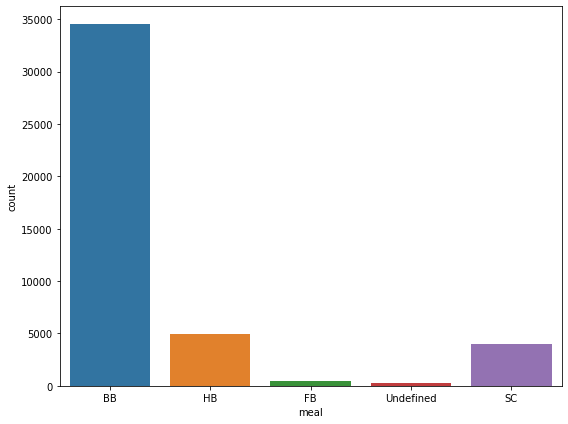

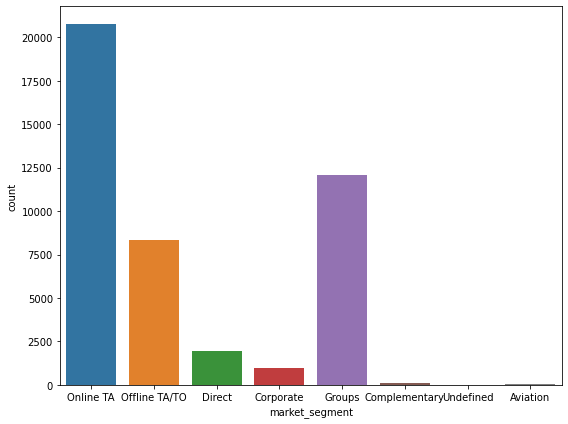

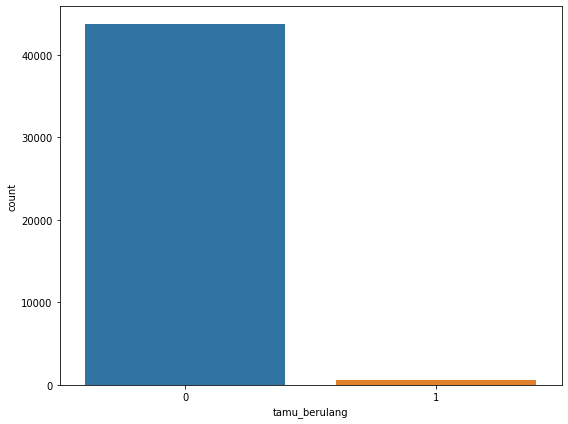

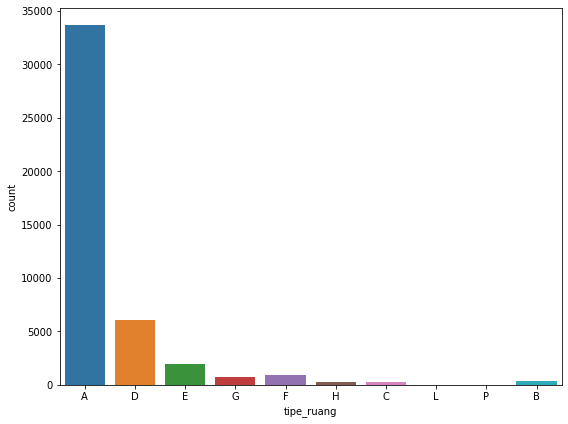

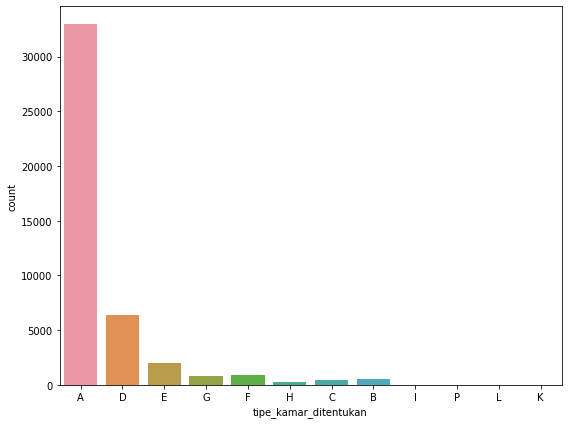

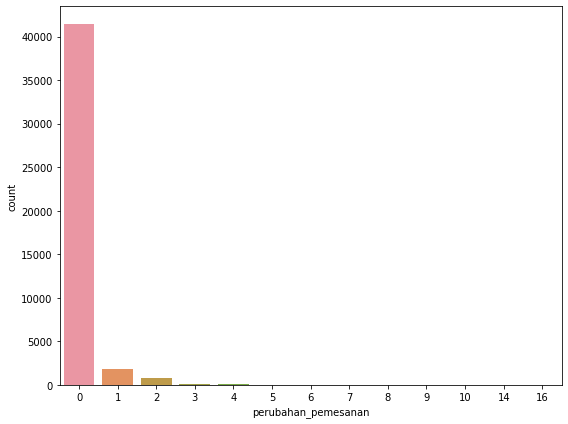

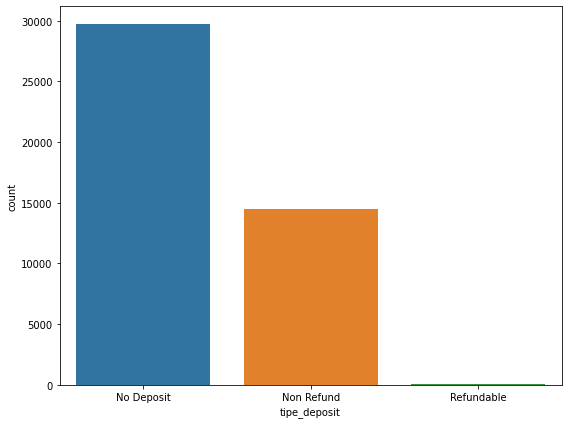

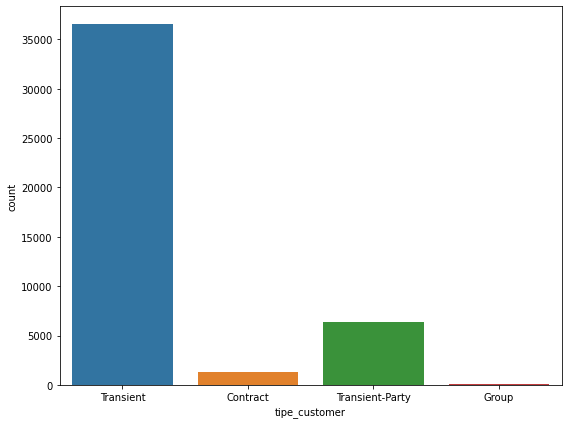

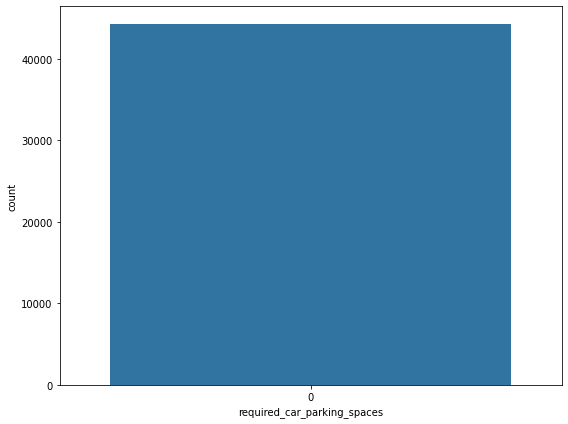

In [ ]:
for col in feature:
    plt.figure(figsize=(8,6))
    sns.countplot(x=col, data=feature)
    plt.title = col
    plt.tight_layout()

Dari hasil analisa didapat kesimpulan, dari grafik dapat dilihat bahwa :
- Jumlah pemesanan dengan 2 orang dewasa dan tidak memiliki anak-anak dan babies cenderung lebih banyak melakukan pembatalan.
- Tipe meal dengan tipe "BB" juga cenderung banyak melakukan pembatalan.
- Market segment paling banyak yang melakukan pembatalan yaitu dari Online TA dan Group. 
- Customer baru / bukan tamu berulang lebih banyak dalam melakukan pembatalan. 
- Untuk tipe ruang dan kamar yang ditentukan yang paling banyak melakukan pembatalan adalah tipe A.
- Customer yang malakukan pembatalan lebih banyak dari customer yang tidak melakukan perubahan pemesanan
- Jenis Deposit dengan pilihan tanpa deposito dan Non Refund lebih banyak dalam melakuakn pematalan
- Tipe customer transien dan tidak membutuhkan parkir paling banyak melakukan pembatalan



In [ ]:
cspembatalan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44224 entries, 8 to 117295
Data columns (total 28 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   tipe_hotel                             44224 non-null  object 
 1   pembatalan                             44224 non-null  object 
 2   waktu_tunggu                           44224 non-null  int64  
 3   tahun_kedatangan                       44224 non-null  int64  
 4   bulan_kedatangan                       44224 non-null  object 
 5   minggu_kedatangan                      44224 non-null  int64  
 6   tanggal_kedatangan                     44224 non-null  int64  
 7   menginap_di_weekend                    44224 non-null  int64  
 8   menginap_in_week_nights                44224 non-null  int64  
 9   dewasa                                 44224 non-null  int64  
 10  anak_anak                              44220 non-null  float64
 11  b

####Karakteristik Customer Yang sebelumnya pernah melakukan pembatalan

In [ ]:
cspembatalansebelumnya = cspembatalan[['dewasa', 'anak_anak',
       'babies', 'meal', 'market_segment', 'tamu_berulang',
       'tipe_ruang', 'tipe_kamar_ditentukan', 'perubahan_pemesanan',
       'tipe_deposit','tipe_customer','required_car_parking_spaces']][cspembatalan["pembatalan_sebelumnya"]>0]
cspembatalansebelumnya

,dewasa,anak_anak,babies,meal,market_segment,tamu_berulang,tipe_ruang,tipe_kamar_ditentukan,perubahan_pemesanan,tipe_deposit,tipe_customer,required_car_parking_spaces
13805,1,0.0,0,BB,Corporate,0,A,A,0,No Deposit,Transient,0
13811,2,0.0,0,HB,Direct,0,E,E,1,No Deposit,Transient,0
13864,2,0.0,0,HB,Direct,0,E,E,0,No Deposit,Transient,0
13918,1,0.0,0,BB,Corporate,0,A,A,0,No Deposit,Transient,0
13950,2,0.0,0,BB,Corporate,0,A,A,0,No Deposit,Transient,0
...,...,...,...,...,...,...,...,...,...,...,...,...
107445,1,0.0,0,BB,Aviation,1,D,D,0,No Deposit,Transient,0
107980,1,0.0,0,BB,Corporate,1,A,A,0,No Deposit,Transient,0
107997,1,0.0,0,BB,Direct,1,A,A,0,No Deposit,Transient,0
108000,1,0.0,0,BB,Direct,1,A,A,0,No Deposit,Transient,0


In [ ]:
feature = cspembatalansebelumnya[['dewasa', 'anak_anak',
       'babies', 'meal', 'market_segment', 'tamu_berulang',
       'tipe_ruang', 'tipe_kamar_ditentukan', 'perubahan_pemesanan',
       'tipe_deposit','tipe_customer','required_car_parking_spaces']]

**Ada sebenyak 6484 customer yang sudah pernah melakukan pembatalan sebelumnya**

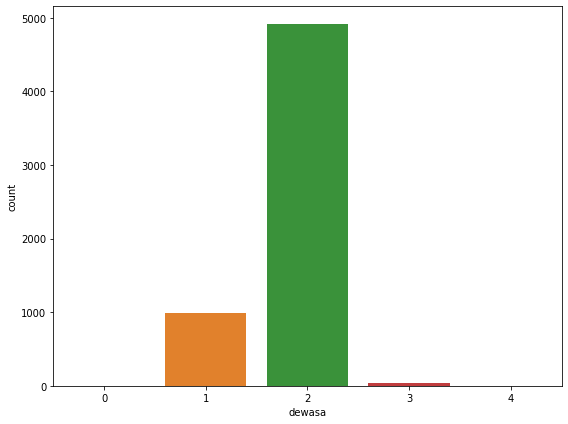

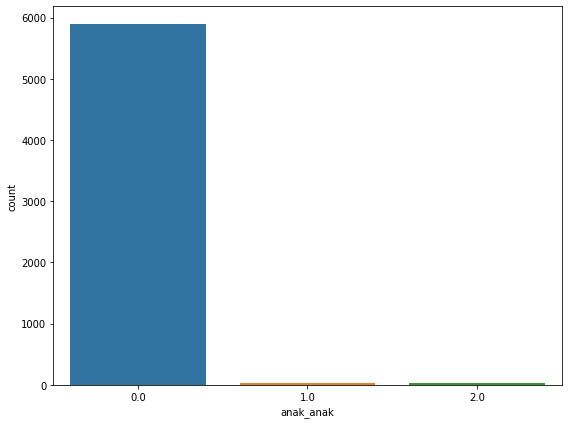

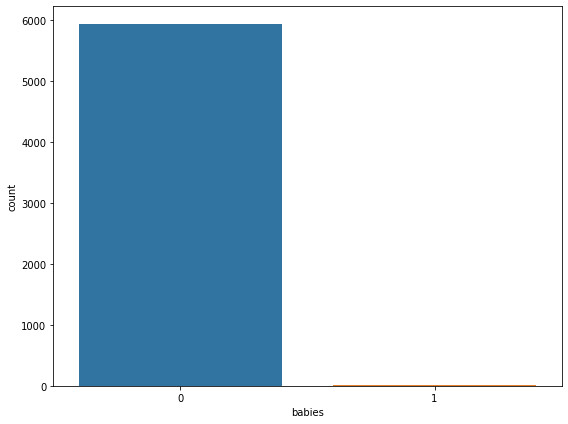

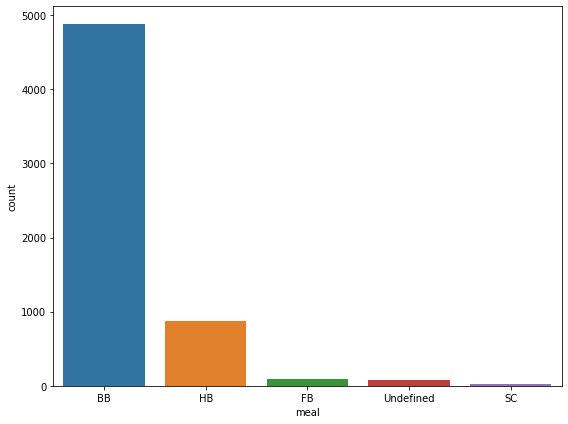

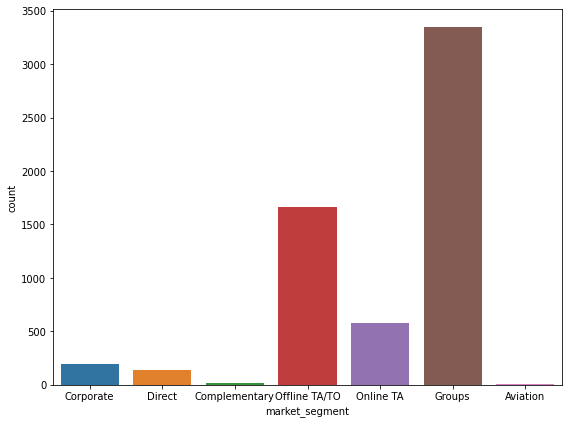

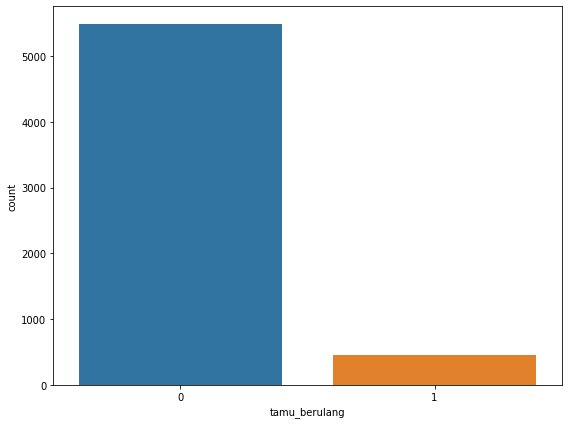

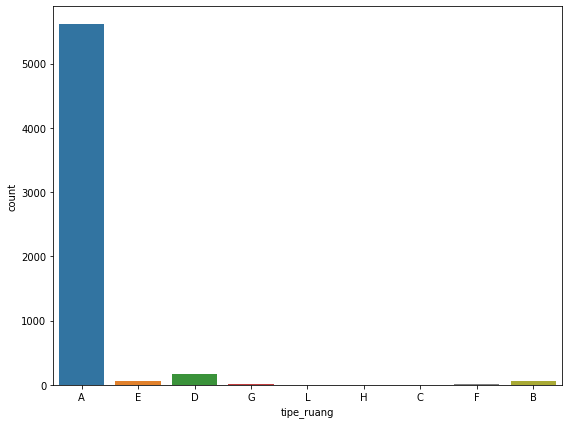

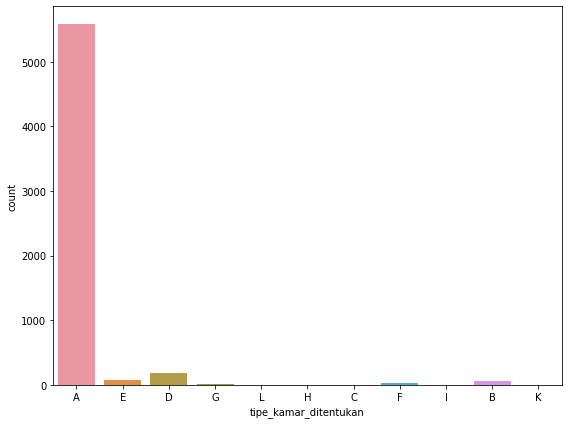

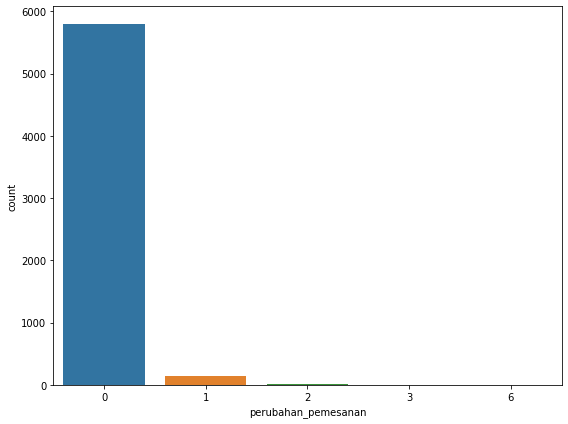

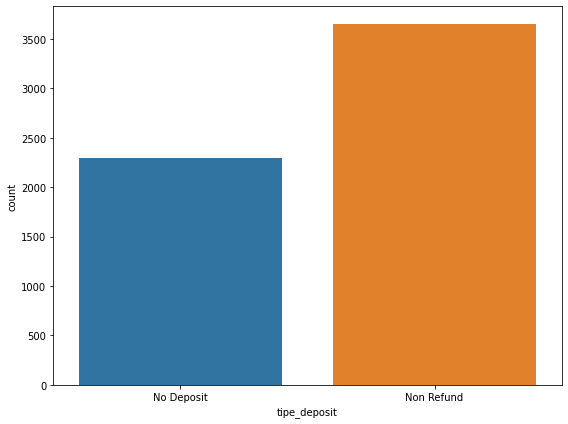

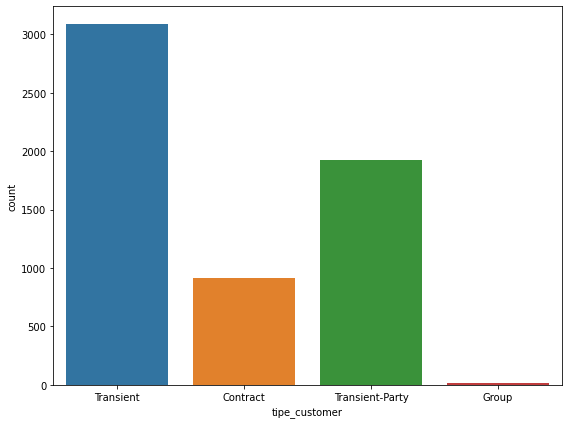

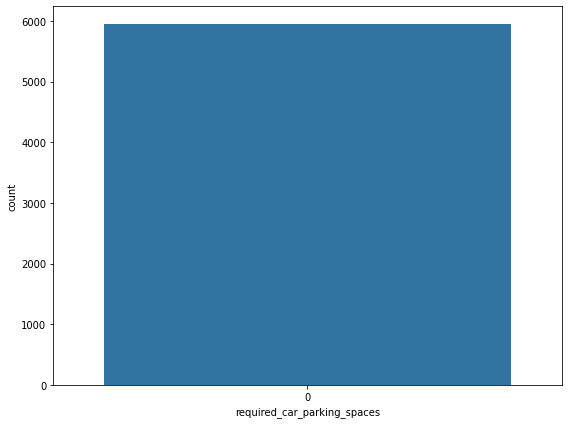

In [ ]:
for col in feature:
    plt.figure(figsize=(8,6))
    sns.countplot(x=col, data=feature)
    plt.title = col
    plt.tight_layout()

Dari hasil analisa didapat kesimpulan dari grafik dapat dilihat bahwa :

- Jumlah pemesanan dengan 2 orang dewasa dan tidak memiliki anak-anak dan babies cenderung lebih banyak melakukan pembatalan sebelumnya.
- Tipe meal dengan tipe "BB" juga cenderung banyak melakukan pembatalan.
- Market segment paling banyak yang melakukan pembatalan sebelumnya yaitu dari Offile TA/TO dan Group.
- Customer baru / bukan tamu berulang lebih banyak dalam melakukan pembatalan sebelumnya.
- Untuk tipe ruang dan kamar yang ditentukan yang paling banyak melakukan pembatalan sebelumnya adalah tipe A.
- Customer yang malakukan pembatalan sebelumnya lebih banyak dari customer yang tidak melakukan perubahan pemesanan
- Jenis Deposit dengan pilihan tanpa deposito dan Non Refund lebih banyak dalam melakukan pematalan
- Tipe customer transien dan tidak membutuhkan parkir paling banyak melakukan pembatalan

## **DATA PRE-PROCESSING**

###Handling Null Value

In [ ]:
df.isnull().sum()

tipe_hotel                                    0
pembatalan                                    0
waktu_tunggu                                  0
tahun_kedatangan                              0
bulan_kedatangan                              0
minggu_kedatangan                             0
tanggal_kedatangan                            0
menginap_di_weekend                           0
menginap_in_week_nights                       0
dewasa                                        0
anak_anak                                     4
babies                                        0
meal                                          0
negara                                      488
market_segment                                0
tamu_berulang                                 0
pembatalan_sebelumnya                         0
pemesanan_sebelumnya_tidak_dibatalkan         0
tipe_ruang                                    0
tipe_kamar_ditentukan                         0
perubahan_pemesanan                     

In [ ]:
df.dropna(subset=['anak_anak'],inplace=True)

In [ ]:
df.isnull().sum()

tipe_hotel                                    0
pembatalan                                    0
waktu_tunggu                                  0
tahun_kedatangan                              0
bulan_kedatangan                              0
minggu_kedatangan                             0
tanggal_kedatangan                            0
menginap_di_weekend                           0
menginap_in_week_nights                       0
dewasa                                        0
anak_anak                                     0
babies                                        0
meal                                          0
negara                                      488
market_segment                                0
tamu_berulang                                 0
pembatalan_sebelumnya                         0
pemesanan_sebelumnya_tidak_dibatalkan         0
tipe_ruang                                    0
tipe_kamar_ditentukan                         0
perubahan_pemesanan                     

In [ ]:
df["company"].fillna("0",inplace=True)
df.dropna(subset=['negara'],inplace=True)

In [ ]:
df.isnull().sum()

tipe_hotel                               0
pembatalan                               0
waktu_tunggu                             0
tahun_kedatangan                         0
bulan_kedatangan                         0
minggu_kedatangan                        0
tanggal_kedatangan                       0
menginap_di_weekend                      0
menginap_in_week_nights                  0
dewasa                                   0
anak_anak                                0
babies                                   0
meal                                     0
negara                                   0
market_segment                           0
tamu_berulang                            0
pembatalan_sebelumnya                    0
pemesanan_sebelumnya_tidak_dibatalkan    0
tipe_ruang                               0
tipe_kamar_ditentukan                    0
perubahan_pemesanan                      0
tipe_deposit                             0
company                                  0
days_in_wai

###Change Data Kategori dan Cek Korelasi Data

In [ ]:
# Ubah kedalam bentuk numerik
#Convertin the predictor variable in a binary numeric variable
df['pembatalan_cat'] = df['pembatalan']
df['pembatalan_cat'].replace(to_replace='Ya', value=1, inplace=True)
df['pembatalan_cat'].replace(to_replace='Tidak',  value=0, inplace=True)

In [ ]:
df["pembatalan_cat"].unique()

array([0, 1])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118898 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   tipe_hotel                             118898 non-null  object 
 1   pembatalan                             118898 non-null  object 
 2   waktu_tunggu                           118898 non-null  int64  
 3   tahun_kedatangan                       118898 non-null  int64  
 4   bulan_kedatangan                       118898 non-null  object 
 5   minggu_kedatangan                      118898 non-null  int64  
 6   tanggal_kedatangan                     118898 non-null  int64  
 7   menginap_di_weekend                    118898 non-null  int64  
 8   menginap_in_week_nights                118898 non-null  int64  
 9   dewasa                                 118898 non-null  int64  
 10  anak_anak                              118898 non-null  

In [ ]:
#kategori = df.select_dtypes(include=['object']).copy()
kategori = df[["tipe_hotel","meal","negara","market_segment","tipe_ruang","tipe_kamar_ditentukan","tipe_deposit","tipe_customer"]]


adr diubah tipe data
bulan di encode manual
company meski di hapus titiknya

In [ ]:
kategori

,tipe_hotel,meal,negara,market_segment,tipe_ruang,tipe_kamar_ditentukan,tipe_deposit,tipe_customer
0,Resort Hotel,BB,PRT,Direct,C,C,No Deposit,Transient
1,Resort Hotel,BB,PRT,Direct,C,C,No Deposit,Transient
2,Resort Hotel,BB,GBR,Direct,A,C,No Deposit,Transient
3,Resort Hotel,BB,GBR,Corporate,A,A,No Deposit,Transient
4,Resort Hotel,BB,GBR,Online TA,A,A,No Deposit,Transient
...,...,...,...,...,...,...,...,...
119385,City Hotel,BB,BEL,Offline TA/TO,A,A,No Deposit,Transient
119386,City Hotel,BB,FRA,Online TA,E,E,No Deposit,Transient
119387,City Hotel,BB,DEU,Online TA,D,D,No Deposit,Transient
119388,City Hotel,BB,GBR,Online TA,A,A,No Deposit,Transient


In [ ]:
encoded_data = LabelEncoder()
for feature in kategori:
        if feature in df.columns.values:
            df[feature+"_cat"] = encoded_data.fit_transform(df[feature])

df.head()

,tipe_hotel,pembatalan,waktu_tunggu,tahun_kedatangan,bulan_kedatangan,minggu_kedatangan,tanggal_kedatangan,menginap_di_weekend,menginap_in_week_nights,dewasa,...,status_reservasi,pembatalan_cat,tipe_hotel_cat,meal_cat,negara_cat,market_segment_cat,tipe_ruang_cat,tipe_kamar_ditentukan_cat,tipe_deposit_cat,tipe_customer_cat
0,Resort Hotel,Tidak,342,2017,July,27,1,0,0,2,...,Check-Out,0,1,0,135,3,2,2,0,2
1,Resort Hotel,Tidak,737,2017,July,27,1,0,0,2,...,Check-Out,0,1,0,135,3,2,2,0,2
2,Resort Hotel,Tidak,7,2017,July,27,1,0,1,1,...,Check-Out,0,1,0,59,3,0,2,0,2
3,Resort Hotel,Tidak,13,2017,July,27,1,0,1,1,...,Check-Out,0,1,0,59,2,0,0,0,2
4,Resort Hotel,Tidak,14,2017,July,27,1,0,2,2,...,Check-Out,0,1,0,59,6,0,0,0,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118898 entries, 0 to 119389
Data columns (total 37 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   tipe_hotel                             118898 non-null  object 
 1   pembatalan                             118898 non-null  object 
 2   waktu_tunggu                           118898 non-null  int64  
 3   tahun_kedatangan                       118898 non-null  int64  
 4   bulan_kedatangan                       118898 non-null  object 
 5   minggu_kedatangan                      118898 non-null  int64  
 6   tanggal_kedatangan                     118898 non-null  int64  
 7   menginap_di_weekend                    118898 non-null  int64  
 8   menginap_in_week_nights                118898 non-null  int64  
 9   dewasa                                 118898 non-null  int64  
 10  anak_anak                              118898 non-null  

In [ ]:
df['adr'] = df['adr'].str.replace(',','')
df['adr'] = df['adr'].astype(int)

In [ ]:
df['company'] = df['company'].astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118898 entries, 0 to 119389
Data columns (total 37 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   tipe_hotel                             118898 non-null  object 
 1   pembatalan                             118898 non-null  object 
 2   waktu_tunggu                           118898 non-null  int64  
 3   tahun_kedatangan                       118898 non-null  int64  
 4   bulan_kedatangan                       118898 non-null  object 
 5   minggu_kedatangan                      118898 non-null  int64  
 6   tanggal_kedatangan                     118898 non-null  int64  
 7   menginap_di_weekend                    118898 non-null  int64  
 8   menginap_in_week_nights                118898 non-null  int64  
 9   dewasa                                 118898 non-null  int64  
 10  anak_anak                              118898 non-null  

In [ ]:
df['bulan_kedatangan_cat'] = df['bulan_kedatangan']
df['bulan_kedatangan_cat'].replace(to_replace='January', value=1, inplace=True)
df['bulan_kedatangan_cat'].replace(to_replace='February', value=2, inplace=True)
df['bulan_kedatangan_cat'].replace(to_replace='March', value=3, inplace=True)
df['bulan_kedatangan_cat'].replace(to_replace='April', value=4, inplace=True)
df['bulan_kedatangan_cat'].replace(to_replace='May', value=5, inplace=True)
df['bulan_kedatangan_cat'].replace(to_replace='June', value=6, inplace=True)
df['bulan_kedatangan_cat'].replace(to_replace='July', value=7, inplace=True)
df['bulan_kedatangan_cat'].replace(to_replace='August', value=8, inplace=True)
df['bulan_kedatangan_cat'].replace(to_replace='September', value=9, inplace=True)
df['bulan_kedatangan_cat'].replace(to_replace='October', value=10, inplace=True)
df['bulan_kedatangan_cat'].replace(to_replace='November', value=11, inplace=True)
df['bulan_kedatangan_cat'].replace(to_replace='December', value=12, inplace=True)

In [ ]:
df['bulan_kedatangan_cat'].unique()

array([ 7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6])

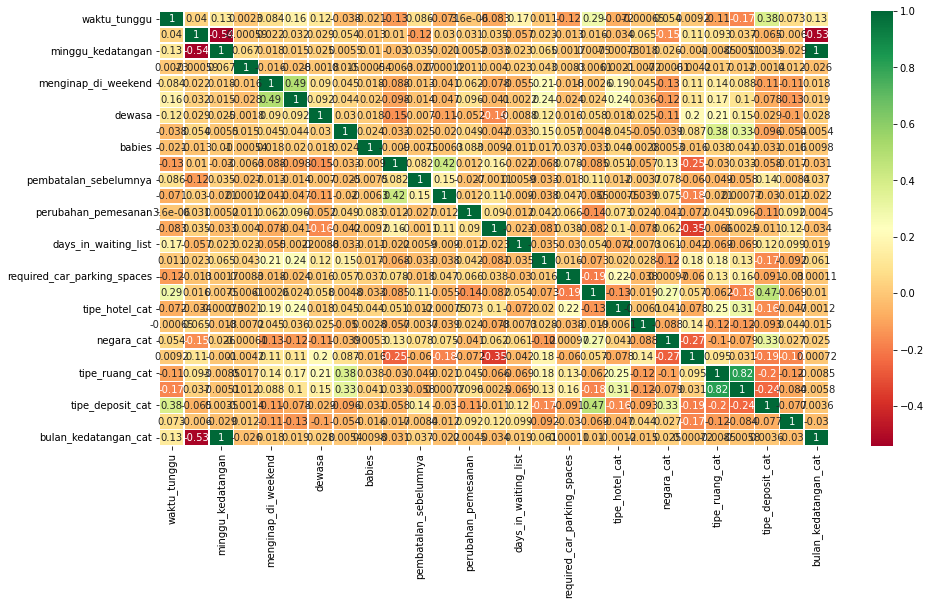

In [ ]:
#cek dengan heatmap
sns.heatmap(df.corr(),linewidth=.5,annot=True,cmap="RdYlGn")
fig = plt.gcf()
fig.set_size_inches(15,8)
plt.show()

In [ ]:
# Cek Urutan korelasi terendah ke tertinggi
korelasi = df.corr()["pembatalan_cat"].sort_values()
korelasi

required_car_parking_spaces             -0.194796
tipe_kamar_ditentukan_cat               -0.175880
perubahan_pemesanan                     -0.144659
tipe_hotel_cat                          -0.133964
tamu_berulang                           -0.085179
company                                 -0.082306
adr                                     -0.072602
tipe_customer_cat                       -0.068768
tipe_ruang_cat                          -0.062230
pemesanan_sebelumnya_tidak_dibatalkan   -0.055493
babies                                  -0.032521
meal_cat                                -0.018657
tanggal_kedatangan                      -0.006127
menginap_di_weekend                     -0.002631
anak_anak                                0.004751
minggu_kedatangan                        0.007465
bulan_kedatangan_cat                     0.010305
tahun_kedatangan                         0.016412
menginap_in_week_nights                  0.024110
days_in_waiting_list                     0.054016


**Berdasarkan matrix didapat beberapa variabel yang memiliki korelasi besar yaitu :**
- anak_anak                                0.005048
- minggu_kedatangan                        0.008148
- tahun_kedatangan                         0.016660
- menginap_in_week_nights                  0.024765
- days_in_waiting_list                     0.054186
- market_segment                           0.059338
- dewasa                                   0.060017
- pembatalan_sebelumnya                    0.110133
- negara                                   0.264223
- waktu_tunggu                             0.293123
- tipe_deposit                             0.468634
- pembatalan                               1.000000





**Kita lihat secara spesifik matrix korelasi dari variabel2 tersebut**


required_car_parking_spaces             -0.195498
tipe_kamar_ditentukan                   -0.176028
perubahan_pemesanan                     -0.144381
tipe_hotel                              -0.136531
tamu_berulang                           -0.084793
tipe_customer                           -0.068140
tipe_ruang                              -0.061282
pemesanan_sebelumnya_tidak_dibatalkan   -0.057358

In [ ]:
cekspesifikmatrix = df[["pembatalan_cat","anak_anak","minggu_kedatangan","tahun_kedatangan","menginap_in_week_nights","days_in_waiting_list","market_segment_cat","dewasa","pembatalan_sebelumnya","negara_cat","waktu_tunggu","tipe_deposit_cat"]]

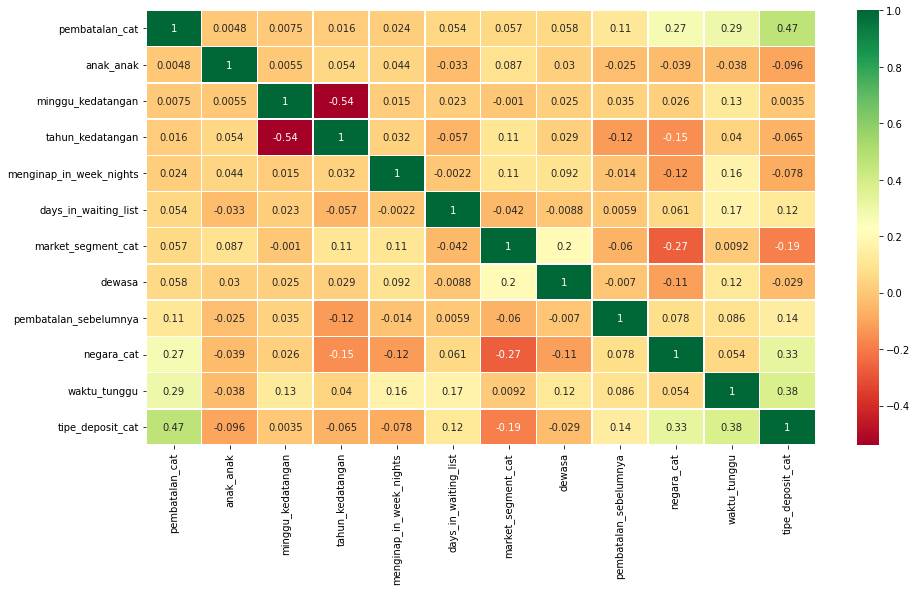

In [ ]:
sns.heatmap(cekspesifikmatrix.corr(),linewidth=.5,annot=True,cmap="RdYlGn")
fig = plt.gcf()
fig.set_size_inches(15,8)
plt.show()

Tipe deposite memiliki korelasi paing besar disusul dengan waktu tunggu,negara dan pembatalan sebelumnya

## **FEATURE ENGINEERING**

Dilipih beberapa fiture yang dirasa memiliki korelaso baik/positive untuk dijadikan variabel input

In [ ]:
features = df[["pembatalan_cat","tipe_deposit_cat","waktu_tunggu","negara_cat","pembatalan_sebelumnya","days_in_waiting_list","minggu_kedatangan"]]

In [ ]:
features.head()

,pembatalan_cat,tipe_deposit_cat,waktu_tunggu,negara_cat,pembatalan_sebelumnya,days_in_waiting_list,minggu_kedatangan
0,0,0,342,135,0,0,27
1,0,0,737,135,0,0,27
2,0,0,7,59,0,0,27
3,0,0,13,59,0,0,27
4,0,0,14,59,0,0,27


In [ ]:
# define min max scaler
scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(features)
data_scaled = pd.DataFrame(scaled,columns=['pembatalan_cat','tipe_deposit_cat','waktu_tunggu','negara_cat','pembatalan_sebelumnya','days_in_waiting_list','minggu_kedatangan'])
data_scaled

,pembatalan_cat,tipe_deposit_cat,waktu_tunggu,negara_cat,pembatalan_sebelumnya,days_in_waiting_list,minggu_kedatangan
0,0.0,0.0,0.464043,0.767045,0.0,0.0,0.500000
1,0.0,0.0,1.000000,0.767045,0.0,0.0,0.500000
2,0.0,0.0,0.009498,0.335227,0.0,0.0,0.500000
3,0.0,0.0,0.017639,0.335227,0.0,0.0,0.500000
4,0.0,0.0,0.018996,0.335227,0.0,0.0,0.500000
...,...,...,...,...,...,...,...
118893,0.0,0.0,0.031208,0.085227,0.0,0.0,0.653846
118894,0.0,0.0,0.138399,0.318182,0.0,0.0,0.653846
118895,0.0,0.0,0.046133,0.244318,0.0,0.0,0.653846
118896,0.0,0.0,0.147897,0.335227,0.0,0.0,0.653846


## **MODELING**

MEMBAGI TRAIN TEST DATA

In [ ]:
X = data_scaled.drop('pembatalan_cat', axis=1)
y = data_scaled['pembatalan_cat']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

### Stats Model (Logistic Regression)

In [ ]:
Input = sm.add_constant(X_train)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
model = sm.Logit(y_train,X_train,missing='drop')
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.545693
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:         pembatalan_cat   No. Observations:                95118
Model:                          Logit   Df Residuals:                    95112
Method:                           MLE   Df Model:                            5
Date:                Fri, 02 Sep 2022   Pseudo R-squ.:                  0.1721
Time:                        15:24:51   Log-Likelihood:                -51905.
converged:                       True   LL-Null:                       -62691.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
tipe_deposit_cat          8.5401      0.124     68.659      0.000       8.296       8.

P-value dari feature yang kita pilih kurang dari 0.005 artinya feature kita memiliki pengaruh yang signifikan

In [ ]:
# odds ratio
round(np.exp(result.params), 3)

tipe_deposit_cat         5.115657e+03
waktu_tunggu             3.647000e+00
negara_cat               6.820000e-01
pembatalan_sebelumnya    1.939382e+13
days_in_waiting_list     3.440000e-01
minggu_kedatangan        2.210000e-01
dtype: float64

PREDIKSI MODEL

In [ ]:
prediction = result.predict(X_test)

In [ ]:
pred_results = pd.DataFrame(prediction, columns = ["logreg_pred"])
pred_results["prediksi"] = pred_results['logreg_pred'].apply(lambda x: 1 if x > 0.5 else 0)
pred_results['actual'] = y_test
pred_results.head()

,logreg_pred,prediksi,actual
37345,0.433910,0,0.0
52406,0.967835,1,1.0
11574,0.425783,0,1.0
54771,0.297477,0,1.0
110114,0.375463,0,0.0


####Model Evaluasi Statsmodel

In [ ]:
print('Test accuracy =  {:.3f}'.format(accuracy_score(pred_results['actual'], pred_results["prediksi"])))
print('Test precision =  {:.3f}'.format(precision_score(pred_results['actual'], pred_results["prediksi"], average='binary')))
print('Test recall =  {:.3f}'.format(recall_score(pred_results['actual'], pred_results["prediksi"], average='binary')))
print('Test f-score =  {:.3f}'.format(f1_score(pred_results['actual'], pred_results["prediksi"], average='binary')))

Test accuracy =  0.756
Test precision =  0.934
Test recall =  0.376
Test f-score =  0.537


### SKLEARN (Logistic Regression)

In [ ]:
LR = LogisticRegression ()
LR.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = LR.predict(X_test)
logreg_test = pd.merge(X_test, y_test, left_index=True, right_index=True, how='outer')
logreg_test['prediction'] = y_pred
logreg_test.head()


,tipe_deposit_cat,waktu_tunggu,negara_cat,pembatalan_sebelumnya,days_in_waiting_list,minggu_kedatangan,pembatalan_cat,prediction
37345,0.0,0.454545,0.335227,0.0,0.0,0.480769,0.0,0.0
52406,0.5,0.096336,0.767045,0.0,0.0,0.461538,1.0,1.0
11574,0.0,0.280868,0.289773,0.0,0.0,0.365385,1.0,0.0
54771,0.0,0.147897,0.318182,0.0,0.0,0.615385,1.0,0.0
110114,0.0,0.037992,0.244318,0.0,0.0,0.307692,0.0,0.0


In [ ]:
print('Accuracy of logistic regression classifier train data: {:.3f}'.format(LR.score(X_train, y_train)))
print('Accuracy of logistic regression classifier test data: {:.3f}'.format(LR.score(X_test, y_test)))

Accuracy of logistic regression classifier train data: 0.759
Accuracy of logistic regression classifier test data: 0.756


####Model Evaluasi Logistic Regresion

In [ ]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.73      0.98      0.83     14845
         1.0       0.91      0.39      0.55      8935

    accuracy                           0.76     23780
   macro avg       0.82      0.68      0.69     23780
weighted avg       0.80      0.76      0.72     23780



Recall msekitar 39% dg presisi 91% dan akurasi 76%

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


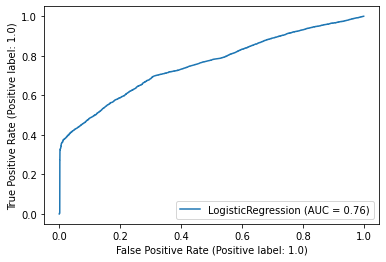

In [ ]:
metrics.plot_roc_curve(LR, X_test, y_test)

Dari test AUC dapat dilihat ada di angka 0.76 ini menunjukan model kita cukup baik, namun kita akan coba denga Tunning Model untuk mendapatkan akurasi yang maksimal

#### Model Validation Logistics Regression

Menerapkan cross validation pada model

In [ ]:
# Memilih k-fold (dipilih k = 5)
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
logreg = LogisticRegression(solver='lbfgs', max_iter=1000)
scores = cross_val_score(logreg, X_train, y_train, cv=kfold)
print("Cross-validation scores: {:.3f}".format(scores.mean()))

Cross-validation scores: 0.758


Dari hasil cross validation dengan menggunakan k-fold didapat rata-rata score adalah 0,758 dimana terhitung sudah lumayan bagus.
<br>
Untuk membuat hasil model lebih bagus lagi maka akan coba dilakukan tuning parameter untuk meningkatkan kinerja model.

In [ ]:
param_grid_lr = { 'C': [0.001, 0.01, 0.1, 1, 10, 100],
                 'class_weight':['balanced', None]}

grid_search_lr = GridSearchCV(logreg, param_grid_lr, cv=kfold)
grid_search_lr.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search_lr.best_params_))
print("Best cross-validation score: {:.3}".format(grid_search_lr.best_score_))

Best parameters: {'C': 100, 'class_weight': None}
Best cross-validation score: 0.76


In [ ]:
scoring = {'acc': 'accuracy',
           'F1': 'f1',
           'prec': 'precision',
           'recall':'recall'}
 
acc = []
f1 = []
prec = []
recall = []
 
logreg = LogisticRegression(C = 100)
scores = cross_validate(logreg, X, y, cv=kfold, scoring=scoring)
 
acc.append(scores['test_acc'].mean())
f1.append(scores['test_F1'].mean())
prec.append(scores['test_prec'].mean())
recall.append(scores['test_recall'].mean())
 
print("Accuracy scores: ", acc)
print("f1 scores: ", f1)
print("Precision scores: ", prec)
print("Recall scores: ", recall)

Accuracy scores:  [0.7592305697215858]
f1 scores:  [0.5480983385244317]
Precision scores:  [0.9044722486725687]
Recall scores:  [0.39318935988748505]


In [ ]:
# Terapkan pada data test
logreg.fit(X_train, y_train)
predictions = logreg.predict(X_test)
 
print("Accuracy score: ", accuracy_score(predictions, y_test))
print("Recall score: ", recall_score(predictions, y_test))

Accuracy score:  0.7569386038687973
Recall score:  0.9109143005991144


In [ ]:
print('Accuracy of logistic regression classifier train data: {:.3f}'.format(logreg.score(X_train, y_train)))
print('Accuracy of logistic regression classifier test data: {:.3f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier train data: 0.760
Accuracy of logistic regression classifier test data: 0.757


Mencoba Menerapkan Stratified k-fold cross validation

In [ ]:
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
logreg = LogisticRegression(solver='lbfgs', max_iter=1000)
scores = cross_val_score(logreg, X_train, y_train, cv=skfold)
print("Stratified K-Fold Cross-validation scores: {:.3f}".format(scores.mean()))

Stratified K-Fold Cross-validation scores: 0.758


In [ ]:
param_grid_lr = { 'C': [0.001, 0.01, 0.1, 1, 10, 100],
                 'class_weight':['balanced', None]}

grid_search_lr = GridSearchCV(logreg, param_grid_lr, cv=skfold)
grid_search_lr.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search_lr.best_params_))
print("Best cross-validation score: {:.3}".format(grid_search_lr.best_score_))

Best parameters: {'C': 100, 'class_weight': None}
Best cross-validation score: 0.76


In [ ]:
scoring = {'acc': 'accuracy',
           'F1': 'f1',
           'prec': 'precision',
           'recall':'recall'}
 
acc = []
f1 = []
prec = []
recall = []
 
logreg = LogisticRegression(C = 100)
scores = cross_validate(logreg, X, y, cv=skfold, scoring=scoring)
 
acc.append(scores['test_acc'].mean())
f1.append(scores['test_F1'].mean())
prec.append(scores['test_prec'].mean())
recall.append(scores['test_recall'].mean())
 
print("Accuracy scores: ", acc)
print("f1 scores: ", f1)
print("Precision scores: ", prec)
print("Recall scores: ", recall)

Accuracy scores:  [0.7592306238363772]
f1 scores:  [0.5483400239115028]
Precision scores:  [0.9036899594886725]
Recall scores:  [0.3935860995184138]


In [ ]:
# Terapkan pada data test
logreg.fit(X_train, y_train)
predictions = logreg.predict(X_test)
 
print("Accuracy score: ", accuracy_score(predictions, y_test))
print("Recall score: ", recall_score(predictions, y_test))

Accuracy score:  0.7569386038687973
Recall score:  0.9109143005991144


In [ ]:
print('Accuracy of logistic regression classifier train data: {:.3f}'.format(logreg.score(X_train, y_train)))
print('Accuracy of logistic regression classifier test data: {:.3f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier train data: 0.760
Accuracy of logistic regression classifier test data: 0.757


**Tidak Terjadi peningkatan  score ketika dilakukan tuning parameter**, artinya dengan feature yang ada didapat score maksimal 76% apabila kita menggunakan logistik regresion. Kita akan menambahkan feature lain yaitu **company** dengan pertimbangan akan mempengaruhi karena bisa jadi customer ada yang memesan melalui biro jasa ataupun pesan langsung tanpa biro jasa, wich is proses cancel order akan lebih mudah dilakukan apabila customer melakukan pesanan secara langsung. Kita juga akan menambahkan feature **tamu berulang**, feature ini penting mengingat bisa jadi angka cancel order untuk tamu berulang/yang sudah langganan sangat kecil kemungkinan mereka melakukan batal pesanan. Feature lain yang akan ditambahkan yaitu **market_segment,tipe_hotel,tipe_customer,tipe_ruang dan tipe_kamar_ditentukan** karena di EDA sendiri cenderung mempengaruhi status order customer

Feature Awal :

df[["pembatalan","tipe_deposit","waktu_tunggu","negara","pembatalan_sebelumnya","days_in_waiting_list","minggu_kedatangan"]]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118898 entries, 0 to 119389
Data columns (total 38 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   tipe_hotel                             118898 non-null  object 
 1   pembatalan                             118898 non-null  object 
 2   waktu_tunggu                           118898 non-null  int64  
 3   tahun_kedatangan                       118898 non-null  int64  
 4   bulan_kedatangan                       118898 non-null  object 
 5   minggu_kedatangan                      118898 non-null  int64  
 6   tanggal_kedatangan                     118898 non-null  int64  
 7   menginap_di_weekend                    118898 non-null  int64  
 8   menginap_in_week_nights                118898 non-null  int64  
 9   dewasa                                 118898 non-null  int64  
 10  anak_anak                              118898 non-null  

In [ ]:
#penambahan feature
features = df[["pembatalan_cat","tipe_deposit_cat","waktu_tunggu","negara_cat","pembatalan_sebelumnya","days_in_waiting_list","minggu_kedatangan",
               "company","tamu_berulang","tipe_hotel_cat"]]

In [ ]:
features

,pembatalan_cat,tipe_deposit_cat,waktu_tunggu,negara_cat,pembatalan_sebelumnya,days_in_waiting_list,minggu_kedatangan,company,tamu_berulang,tipe_hotel_cat
0,0,0,342,135,0,0,27,0.0,0,1
1,0,0,737,135,0,0,27,0.0,0,1
2,0,0,7,59,0,0,27,0.0,0,1
3,0,0,13,59,0,0,27,0.0,0,1
4,0,0,14,59,0,0,27,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...
119385,0,0,23,15,0,0,35,0.0,0,0
119386,0,0,102,56,0,0,35,0.0,0,0
119387,0,0,34,43,0,0,35,0.0,0,0
119388,0,0,109,59,0,0,35,0.0,0,0


## **EVALUATION**

## **Modeling Ulang**

MEMBAGI TRAIN TEST DATA

In [ ]:
X = features.drop('pembatalan_cat', axis=1)
y = features['pembatalan_cat']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

#### Logistic Regression

In [ ]:
LR = LogisticRegression()
LR.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
y_pred = LR.predict(X_test)
logreg_test = pd.merge(X_test, y_test, left_index=True, right_index=True, how='outer')
logreg_test['prediction'] = y_pred
logreg_test.head()

,tipe_deposit_cat,waktu_tunggu,negara_cat,pembatalan_sebelumnya,days_in_waiting_list,minggu_kedatangan,company,tamu_berulang,tipe_hotel_cat,pembatalan_cat,prediction
47428,0,23,51,0,0,9,0.0,0,0,1,0
71981,0,0,154,0,0,29,0.0,0,0,1,0
116709,0,423,43,0,0,29,0.0,0,0,0,1
47918,0,29,169,0,0,11,0.0,0,0,1,0
97091,0,18,59,0,0,38,0.0,0,0,0,0


In [ ]:
print('Accuracy of logistic regression classifier train data: {:.3f}'.format(LR.score(X_train, y_train)))
print('Accuracy of logistic regression classifier test data: {:.3f}'.format(LR.score(X_test, y_test)))

Accuracy of logistic regression classifier train data: 0.760
Accuracy of logistic regression classifier test data: 0.756


In [ ]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.97      0.83     14851
           1       0.88      0.40      0.55      8929

    accuracy                           0.76     23780
   macro avg       0.81      0.68      0.69     23780
weighted avg       0.79      0.76      0.73     23780



Setelah penambahan fiture ternyata akurasinya hampir sama, namun secara bisnis feature2 baru tersebut dibutuhkan. oleh sebab itu kita akan tetap menggunakan modeling kedua dengan beberapa tambahan feature untuk memprediksi data karena secara akurasi tidak terlalu jauh, dimana pada model pertama yaitu :

Accuracy of logistic regression classifier train data: 0.761
Accuracy of logistic regression classifier test data: 0.758 

**perbedaanya hanya beda satu angka diblakang koma, kita ambil kesimpulan secara akurasi dan best accuration model logistik ini memang berada di kiradan 76 persen**

####**Uji Coba Clasification Dengan Model Lain**

In [ ]:
# Percobaan Model Lain
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
models = [KNeighborsClassifier(), DecisionTreeClassifier(), RandomForestClassifier()]

In [ ]:
for model in models:
  print(model)
  model.fit(X_train,y_train)
  print('Accuracy of classifier train data: {:.3f}'.format(LR.score(X_train, y_train)))
  print('Accuracy ofclassifier test data: {:.3f}'.format(LR.score(X_test, y_test)))
  print('---------------------------------')

KNeighborsClassifier()
Accuracy of classifier train data: 0.760
Accuracy ofclassifier test data: 0.756
---------------------------------
DecisionTreeClassifier()
Accuracy of classifier train data: 0.760
Accuracy ofclassifier test data: 0.756
---------------------------------
RandomForestClassifier()
Accuracy of classifier train data: 0.760
Accuracy ofclassifier test data: 0.756
---------------------------------


Dari hasil uji coba dengan model lain dapat disimpulkan bahwa akurasi terbaik memang tetap berada dikisaran akurasi 76 persen. Oleh karena itu kita akan menggunakan model Logistic Regression  untuk memprediksi new data

##**LOAD AND PREDICT NEW DATA**

Feature yang sudah digunakan adalah: 

"pembatalan_cat","tipe_deposit_cat","waktu_tunggu","negara_cat","pembatalan_sebelumnya","days_in_waiting_list","minggu_kedatangan",
"company","tamu_berulang","tipe_hotel_cat"

####**Lihat Label Setiap Kategory**

In [ ]:
df[["pembatalan","pembatalan_cat"]].value_counts()

pembatalan  pembatalan_cat
Tidak       0                 74745
Ya          1                 44153
dtype: int64

In [ ]:
df[["tipe_deposit","tipe_deposit_cat"]].value_counts()

tipe_deposit  tipe_deposit_cat
No Deposit    0                   104163
Non Refund    1                    14573
Refundable    2                      162
dtype: int64

In [ ]:
df[["negara","negara_cat"]].value_counts()

negara  negara_cat
PRT     135           48586
GBR     59            12129
FRA     56            10415
ESP     51             8568
DEU     43             7287
                      ...  
MLI     109               1
MMR     111               1
MRT     114               1
SMR     148               1
PYF     137               1
Length: 177, dtype: int64

In [ ]:
df[["tipe_hotel","tipe_hotel_cat"]].value_counts()

tipe_hotel    tipe_hotel_cat
City Hotel    0                 79302
Resort Hotel  1                 39596
dtype: int64

####**Predict New Data**

In [ ]:
LR = LogisticRegression()
LR.fit(X_train, y_train)

y_pred = LR.predict(X_test)
logreg_test = pd.merge(X_test, y_test, left_index=True, right_index=True, how='outer')
logreg_test['prediction'] = y_pred
logreg_test

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


,tipe_deposit_cat,waktu_tunggu,negara_cat,pembatalan_sebelumnya,days_in_waiting_list,minggu_kedatangan,company,tamu_berulang,tipe_hotel_cat,pembatalan_cat,prediction
47428,0,23,51,0,0,9,0.0,0,0,1,0
71981,0,0,154,0,0,29,0.0,0,0,1,0
116709,0,423,43,0,0,29,0.0,0,0,0,1
47918,0,29,169,0,0,11,0.0,0,0,1,0
97091,0,18,59,0,0,38,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
74684,1,365,135,1,0,42,0.0,0,0,1,1
22382,0,0,51,0,0,13,0.0,0,1,0,0
97182,0,16,51,0,0,38,0.0,0,0,0,0
63995,0,23,1,0,0,8,0.0,0,0,1,0


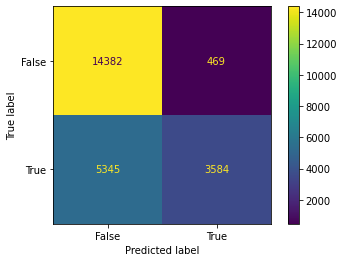

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred) 

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
tipe_deposit = int(input('Apakah ada tipe_deposit')) #No Deposit  =  0 , Non Refund   = 1,Refundable    2 
waktu_tunggu = int(input('Masukan waktu_tunggu')) #7
negara= int(input('Masukan kode negara')) #PRT = 135
pembatalan_sebelumnya = int(input("Input pembatalan_sebelumnya")) #0
days_in_waiting_list = int(input("Input days_in_waiting_list"))#0
minggu_kedatangan = int(input("Input minggu_kedatangan"))#27
company = int(input("Input company")) #223
tamu_berulang = int(input("apakah tamu_berulang"))#1
tipe_hotel = int(input("Pilih tipe_hotel")) #City Hotel =0, Resort Hotel = 1

#model terbaik
databaru = np.array([[tipe_deposit, waktu_tunggu, negara, pembatalan_sebelumnya, days_in_waiting_list, minggu_kedatangan, company, tamu_berulang, tipe_hotel]])

prediksi2=LR.predict(databaru)

if prediksi2 == 0:
  print("Customer Tidak melakukan pembatalan")
else:
  print("Customer Melakukan pembatalan")


Apakah ada tipe_deposit0
Masukan waktu_tunggu18
Masukan kode negara59
Input pembatalan_sebelumnya0
Input days_in_waiting_list0
Input minggu_kedatangan38
Input company00
apakah tamu_berulang0
Pilih tipe_hotel0
Customer Tidak melakukan pembatalan


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


## **KESIMPULAN/SARAN**

Perusahaan perlu membuat promosi untuk resort hotel karena presentasi order yang lumayan kecil jika dibandingkan dengan city hotel, kemudian matrix yang mempengaruhi angka pembatalan pemesanan juga perlu di reduse seperti misalkan mengharuskan untuk deposite terlebih dahulu untuk pemesanan hotel dan perlu melakukan mekanisme promosi pada negara-negara dengan angka order terkecil, mungkin bisa mengadayakan upaya promosi kerjasama dengan destinasi wisata setempat untuk melakukan upaya marketing campaign atau promosi lainya dengan target negara-negara tersebut. Bisa juga mengadakan sistem loyalti point/rewards ataupun referal bagi pengunjung setia hotel.